<a href="https://colab.research.google.com/github/L-Shyamal/EN2550-Assignment_1/blob/main/assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


Original Image


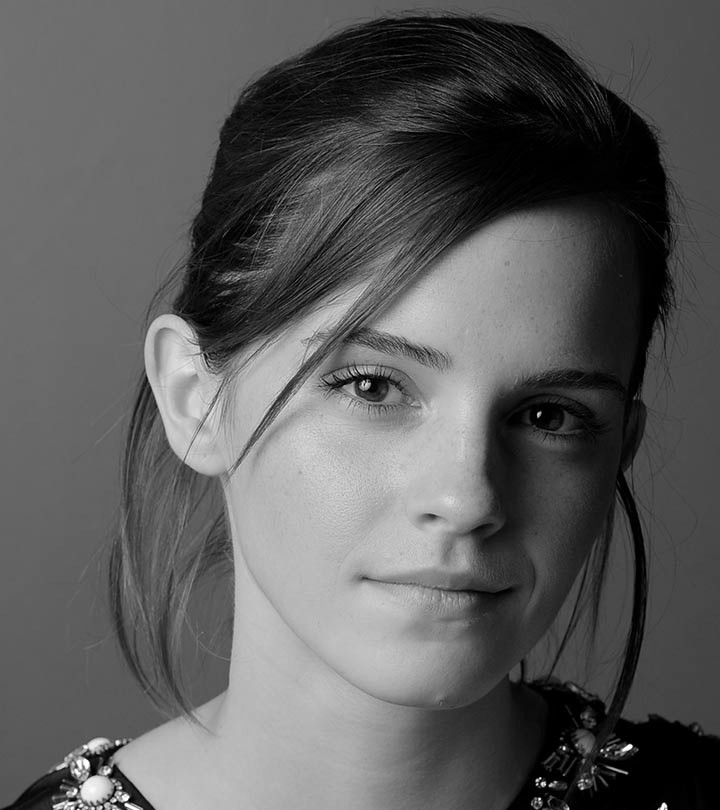

Transformed Image


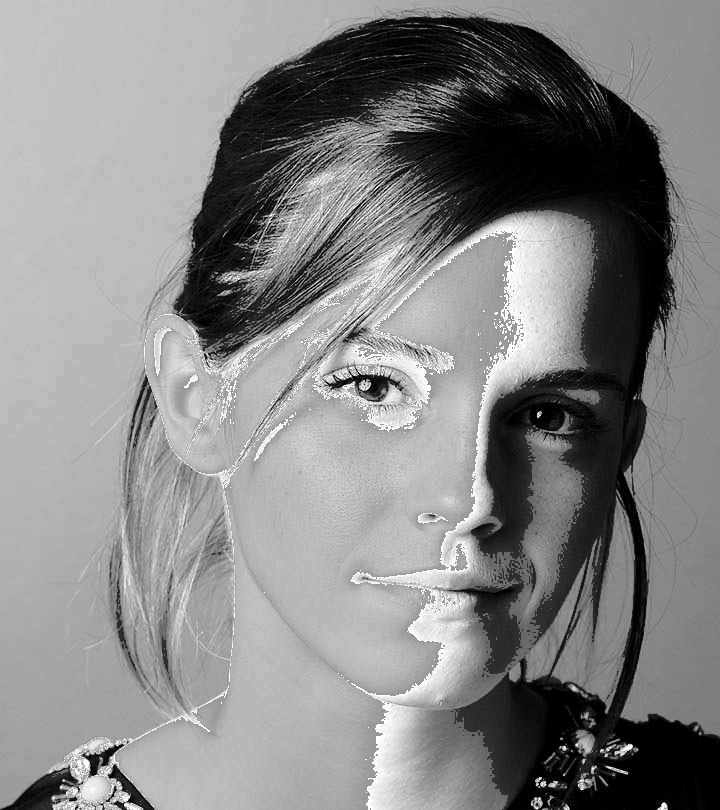

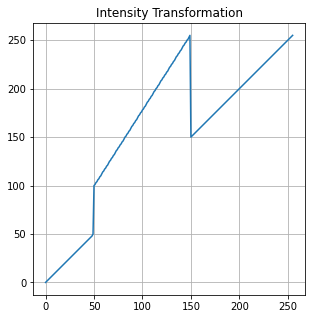

In [7]:
img = cv.imread("/content/drive/MyDrive/Assignment1/emma_gray.jpg")

t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(255,150,0)
t5 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
fig,ax = plt.subplots(figsize=(5,5))
ax.set_title("Intensity Transformation")
ax.grid()
ax.plot(t)

ax.set_aspect("equal")
assert len(t) ==256
g = cv.LUT(img,t)

print("Original Image")
cv2_imshow(img)
print("Transformed Image")
cv2_imshow(g)

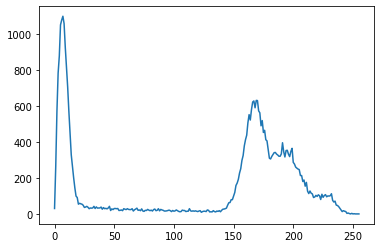

In [8]:
brain = cv.imread("/content/drive/MyDrive/Assignment1/brain_proton_density_slice.png")


hist_brain = cv.calcHist([brain],[0],None,[256],[0, 256])
plt.plot(hist_brain)




Original Image


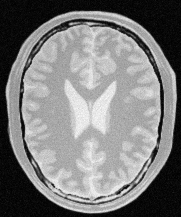

Gray matter Image


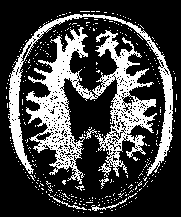

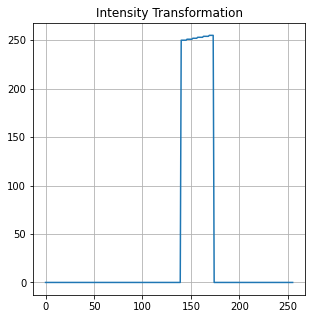

In [9]:
# Gray matter
t1 = np.linspace(0,0,140)
t2 = np.linspace(0,250,0)
t3 = np.linspace(250,256,35)
t4 = np.linspace(256,0,0)
t5 = np.linspace(0,0,81)

t = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)

fig,ax = plt.subplots(figsize=(5,5))
ax.set_title("Intensity Transformation")
ax.grid()
ax.plot(t)
ax.set_aspect("equal")
assert len(t) ==256
g = cv.LUT(brain,t)



print("Original Image")
cv2_imshow(brain)
print("Gray matter Image")
cv2_imshow(g)

Original Image


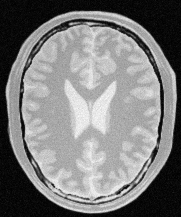

White Matter Image


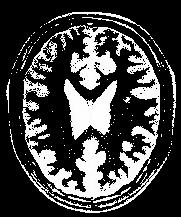

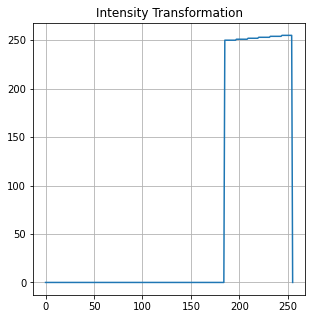

In [10]:
# White matter
t1 = np.linspace(0,0,185)
t2 = np.linspace(0,250,0)
t3 = np.linspace(250,256,71)


t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig,ax = plt.subplots(figsize=(5,5))
ax.set_title("Intensity Transformation")
ax.grid()
ax.plot(t)
ax.set_aspect("equal")
assert len(t) ==256
g = cv.LUT(brain,t)



print("Original Image")
cv2_imshow(brain)
print("White Matter Image")
cv2_imshow(g)

Original Image


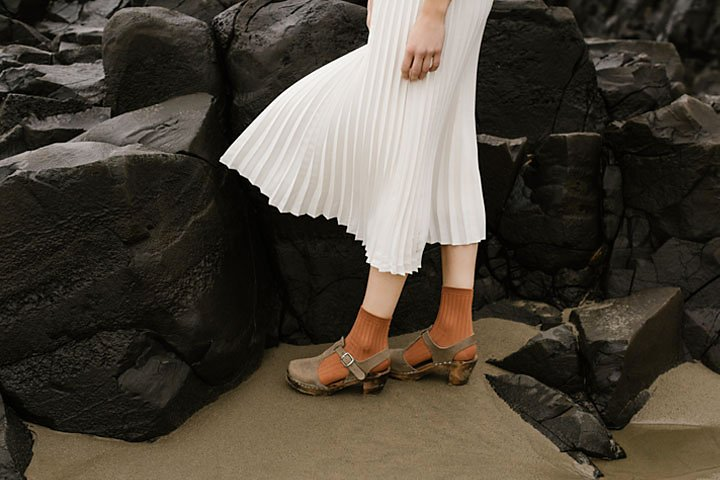

Output Image


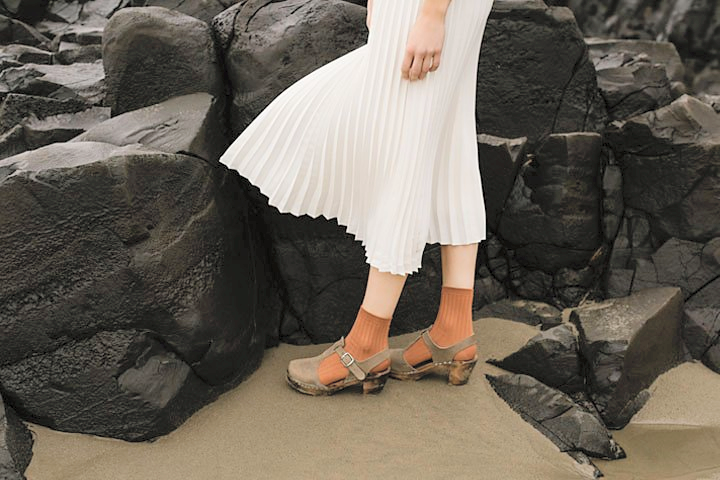

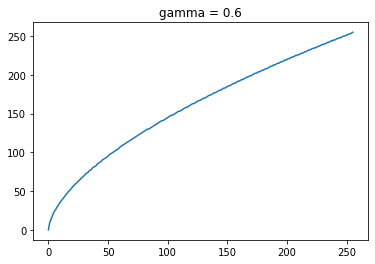

In [20]:
# Q 3
original_image = cv.imread("/content/drive/MyDrive/Assignment1/highlights_and_shadows.jpg")
assert original_image is not None

Lab = cv.cvtColor(original_image, cv.COLOR_BGR2LAB)
gamma = 0.6
L,a,b = cv.split(Lab)
t = np.array([(p/255)**gamma*255 for p in range (0,256)]).astype(np.uint8)
fig, ax = plt.subplots()
ax.plot(t)
ax.set_title("gamma = "+str(gamma))


g = cv.LUT(L ,t)
trans = cv.merge([g,a,b])
output_image = cv.cvtColor(trans,cv.COLOR_LAB2BGR)

print("Original Image")
cv2_imshow(original_image)
print("Output Image")
cv2_imshow(output_image)